In [ ]:
from datasets import load_dataset, Dataset
from watermark_forspacy import Watermark
import torch
from transformers import AutoTokenizer
from watermark import Detector
from transformers import AutoTokenizer,AutoModelForCausalLM
import torch
dataset = load_dataset("json", data_files="/data3/wcr/my_project/selective_watermark_based_on_semantic/c4_subset_500.jsonl")
dataset=dataset["train"]
print(dataset)
gamma=0.25
delta=3


torch.cuda.set_device(4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model= AutoModelForCausalLM.from_pretrained("/data3/wcr/my_project/selective_watermark_based_on_semantic/models/opt-6.7b",torch_dtype=torch.float16).to(device)
tokenizer=AutoTokenizer.from_pretrained("/data3/wcr/my_project/selective_watermark_based_on_semantic/models/opt-6.7b")


In [ ]:
import json
spacy_record_path="/data3/wcr/my_project/selective_watermark_based_on_semantic/eval/token_pos.json"
wm = Watermark(checkpoint_path="/data3/wcr/my_project/selective_watermark_based_on_semantic/ckpt/tmp/selective_network_epoch0_step2000.pth",device=device,k=6,model=model,tokenizer=tokenizer, max_new_tokens= 225,min_new_tokens=175,record_spacy=True,spacy_record_path=spacy_record_path)
for data in dataset:
    text=data['text']    
    input_text=text[:300]
    output=wm.generate_watermark(input_text,gamma,delta)


 
                

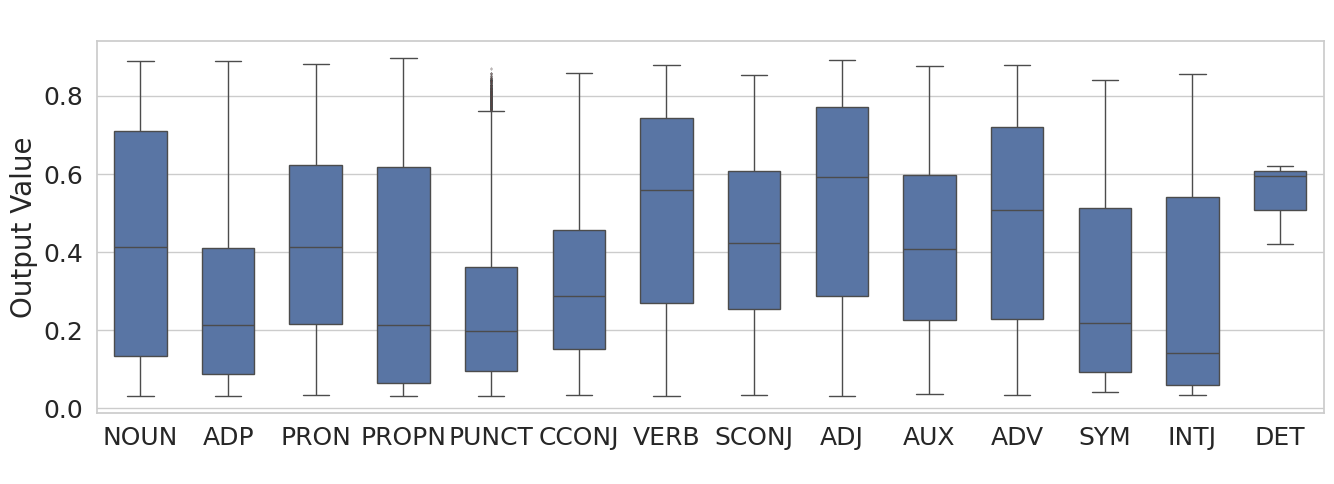

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例 JSON 格式数据，实际使用时替换成你的数据
import json
with open("/data3/wcr/my_project/selective_watermark_based_on_semantic/eval/token_pos.json", "r") as f:
    data_dict = json.load(f)

del data_dict["X"]
del data_dict["SPACE"]
del data_dict["PART"]
del data_dict["NUM"]


df = pd.DataFrame([
    {"Category": key, "Value": value}
    for key, values in data_dict.items()
    for value in values
])
flier_props = dict(marker='o', markersize=0.2, markerfacecolor='red', linestyle='none')
# 设置绘图风格
sns.set(style="whitegrid")
# 绘制箱线图
plt.figure(figsize=(13.5, 5))
sns.boxplot(x="Category", y="Value", data=df, flierprops=flier_props, width=0.6)


plt.title(" ", fontsize=22)
plt.xlabel(" ")
plt.ylabel("Output Value", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('/data3/wcr/my_project/selective_watermark_based_on_semantic/eval/boxplot.pdf')  
plt.show()
